Scrivere la function `NewtonRaphson.py`, che implementa il metodo di Newton-Raphson
per il calcolo della soluzione di un sistema di equazioni non lineari. 

Tale function
deve assumere come dati in input:
- fname: nome della funzione vettoriale di cui calcolare lo zero;
- JacName: nome della funzione che calcola lo J acobiano della funzione vettoriale;
- X0: vettore contenente le componenti dell'iterato iniziale);
- tolx tolleranza  per il test d'arresto sull'incremento
        ||X_{k+1}-X_k||/||X_{k}||<= tolx
- tolf tolleranza per il test del residuo
        ||F(Xk+1)|| <= tolf;
- NMAX numero massimo di iterazioni.
In output devono essere restituiti il vettore contenente l'approssimazione dello zero x, un vettore contenente l'errore relativo tra due iterati successivi, il numero di iterazioni
effettuate, nit.


Risolvere i seguenti tre sistemi non lineari:
1) 
2x0-cos(x1)=0

sin(x0)+2x1=0

2) 
x0^2+x1^2-9=0

x0^2+x1*2-2=0

3) 
4x0^2+x_1^2^=4

x0+x1=sin(x0-x1)



Per determinare l'iterato iniziale X 0 , servirsi del metodo grafico per individuare un 
iterato iniziale nell'intorno della soluzione che si vuole approssimare. Visualizzare le 
curve di livello corrisponenti a z=O delle due superfici z = fi (x1 ,x2 ) e z = h(x1 , x 2 ) e 
definire come iterato iniziale un vettore X 0 oppurtuno le cui componenti stanno in un 
intorno della soluzione (punti di intersezione tra le curve di livello delle due superfici) 
 

In [1]:
import numpy.linalg as npl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-4, 4, 0.1)
y = np.arange(-4, 4, 0.1)
X, Y = np.meshgrid(x, y)

scelta_sistema=int(input("Scelta sistema"))

if scelta_sistema==1:
        

        F= lambda x : np.array([
            2*x[0] -np.cos(x[1]),
            np.sin(x[0])+2*x[1]])
        Jac= lambda x: np.array([[2, np.sin(x[1])],[np.cos(x[0]),2]])
        Z=2*X -np.cos(Y)
        Z1=np.sin(X)+2*Y

elif scelta_sistema==2:
        
        F= lambda x : np.array([
            x[0]**2 + x[1]**2-9,
            x[0]+x[1]-3,
        ])
    
        Jac= lambda x: np.array([[2*x[0], 2*x[1]],[1,1]])

        Z=X**2+Y**2-9
        Z1=X+Y-3
elif scelta_sistema==3:

        F= lambda x : np.array([
                    4*x[0]**2+x[1]**2-4,
                    x[0]+x[1]-np.sin(x[0]-x[1])
                   ])
        Jac= lambda x: np.array([[8*x[0], 2*x[1]],[1-np.cos(x[0]-x[1]),1+np.cos(x[0]-x[1])]])
        Z=4*X**2+Y**2-4
        Z1=X+Y-np.sin(X-Y)

# Plotta la superficie direttamente
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotta la superficie
ax.plot_surface(X, Y, Z, cmap=plt.cm.viridis)

# Mostra il grafico
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotta la superficie
ax.plot_surface(X, Y, Z1, cmap=plt.cm.viridis)

# Mostra il grafico
plt.show()

        

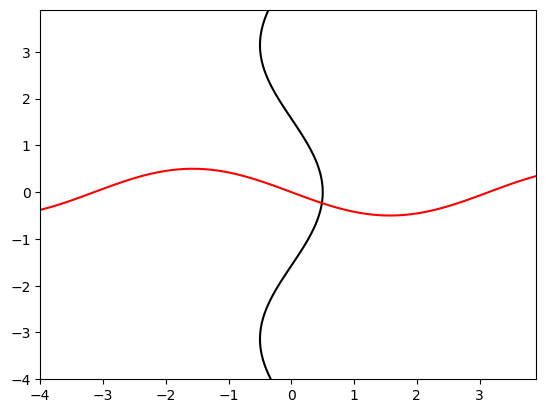

In [3]:
plt.contour(X, Y, Z, levels=[0], colors='black')
plt.contour(X, Y, Z1, levels=[0], colors='red')
 
plt.show()

In [4]:
def my_newtonSys(fun, jac, x0, tolx, tolf, nmax):

  """
  Funzione per la risoluzione del sistema f(x)=0
  mediante il metodo di Newton.

  Parametri
  ----------
  fun : stringa
    Nome del file contenente la funzione non lineare.
  jac : stringa
    Nome del file contenente la matrice Jacobiana della funzione.
  x0 : array
    Vettore contenente l'approssimazione iniziale della soluzione.
  tolx : float
    Parametro di tolleranza per l'errore assoluto.
  tolf : float
    Parametro di tolleranza per l'errore relativo.
  nmax : int
    Numero massimo di iterazioni.

  Restituisce
  -------
  x : array
    Vettore soluzione del sistema (o equazione) non lineare.
  it : int
    Numero di iterazioni fatte per ottenere l'approssimazione desiderata.
  Xm : array
    Vettore contenente la norma dell'errore relativo tra due iterati successivi.
  """

  matjac = jac(x0)
  print("fun(x0)=",fun(x0))
  
  if np.linalg.det(matjac) == 0:
    print("La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo")
    return None, None,None

  s = -np.linalg.solve(matjac, fun(x0))
  # Aggiornamento della soluzione
  it = 1
  x1 = x0 + s
  fx1 = fun(x1)
  print(fun(x0))
  print(fun(x1))

  Xm = [np.linalg.norm(s, 1)/np.linalg.norm(x1,1)]
  
  while it <= nmax and np.linalg.norm(fx1, 1) >= tolf and np.linalg.norm(s, 1) >= tolx * np.linalg.norm(x1, 1):
    
    x0 = x1
    it += 1
    matjac = jac(x0)
    if np.linalg.det(matjac) == 0:
            print("La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo")
            return None, None,None

    # Risolvo il sistema lineare avente come matrice dei coefficienti la
    # matrice Jacobiana e come termine noto la Funzione vettoriale F valutata
    # in x0
    s = -np.linalg.solve(matjac, fun(x0))

    # Aggiornamento della soluzione
    x1 = x0 + s
    fx1 = fun(x1)
    Xm.append(np.linalg.norm(s, 1)/np.linalg.norm(x1,1))

  return x1, it, Xm

In [5]:
x0=np.array([-1,1])
nmax=500
xN,contN,XmN= my_newtonSys(F,Jac,x0,1e-10,1e-10,nmax)


 

fun(x0)= [-2.54030231  1.15852902]
[-2.54030231  1.15852902]
[0.41683489 0.56895121]


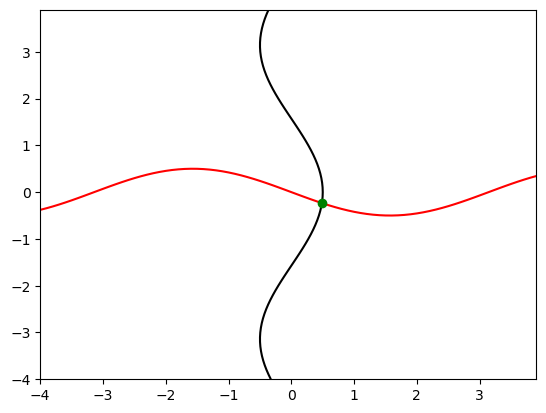

In [6]:
plt.contour(X, Y, Z, levels=[0], colors='black')
plt.contour(X, Y, Z1, levels=[0], colors='red')
plt.plot(xN[0],xN[1],'go')
plt.show()